In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable 
pd.options.display.max_columns=None

## Preguntas propuestas
Ve qués se cobra generalmente para este campo. Buscar para analistas y business intelligence en Europa. Ver también diferencias entre géneros. Mujeres y hombres trabajando en el sector (con un quesito). Años de experiencia por géneros, ver si las mujeres se han ido incorporando más a este mercado o no. Ver nivel de estudios en relación con el puesto que ocupa Y los años experiencia.

Estudio de mercado: Las personas que trabajan de estos puestos: tamaño empresa, industria... 
Machine learning: Cuánto invierten realmente en *Machine Learning*.

Qué herramientas utilizan (realizar para todas las columnas).

Hacer un filtro:

.isin(): puestos - data analyst y business intelligence. Ver todas las herramientas de manera general. Hacerlo con **todas**. 
Filtro por género para buscar por mujeres. 
- Un dataframe para ver las herramientas: 
    - cómo varían las herramientas según los años de experiencia.


Brecha salarial para mujeres y hombres en el mismo puesto. A tener en cuenta: mismos años, mismo puesto... ver si hay diferencia de salario real.

Años de las mujeres que estén trabajando en el sector, para ver si hay edades que trabajen menos por cuestiones de maternidad, etc. 


¿Qué tipo de gráficas vamos a querer?

- Graficas que hay:
    - Barras. Las barras apiladas para poder los años de experiencia que tienen los hombres vs. mujeres, para comprobar si los hombres se mantienen en el sector más o menos que las mujeres.
    - Dispersión. Quizá para ver la brecha salarial entre géneros, u otras cosas. 
    - Histogramas. Por ejemplo, para ver las edades, para las herramientas...
    - Sectores(quesitos): Géneros en el sector. 
    - Violín. No vemos utilidad.
    - De caja. No vemos utilidad. 

In [2]:
def quitar_espacios(elemento):
    '''
    Esta función recoge elemento a elemento de una columna, quita los espacios de los lados y
    devuelve el string modificado'''
    try:
        return elemento.strip()
    except:
        return np.nan

In [3]:
def explode_strip(dataframe,columna):
    ''' 
    Esta función recoge el dataframe y la columna a modificar. Hace un explode de esa columna y quita los espacios de cada elemento.
    Devuelve el dataframe modificado.'''
    dataframe2 = dataframe.explode(columna)
    dataframe2[columna] = dataframe2[columna].apply(quitar_espacios)
    return dataframe2

In [102]:
def grafica(dataframe,columna,nombre):
    df_grafica = explode_strip(dataframe,columna)
    plt.figure(figsize= (20,3))
    fig = sns.barplot(x = df_grafica[columna].value_counts().index, y = df_grafica[columna].value_counts(), data = df_grafica, palette = 'pastel')
    fig.set_xlabel(columna, fontweight = "bold", fontsize = 11)
    fig.set_ylabel('Count', fontweight = "bold", fontsize = 11)

    fig.set_title(nombre, fontweight = "bold", fontsize = 12)
    plt.xticks(rotation=90)
    fig.spines['top'].set_visible(False)
    fig.spines['right'].set_visible(False);

## Importante

- Crear el Dataframe sólo con los países de Europa.
- Quedarnos únicamente con Data Analyst y con Business Intelligence 

In [4]:
df = pd.read_pickle('archivos_resultantes/dataframe_graficas.pkl')
df.sample(1)

,id_survey,time,age,gender,country,studies,position,years_programming,preferred_language,computing_platform,times_use_tpu,years_use_ml,industry,company_size,da_employees,company_ml,year_salary,investment_ml,main_bd,main_bi,main_da,duties,best_cloud_services,regular_automl_a,data_storage_products_b
8359,8359,715,30-34,Man,Belarus,Bachelor’s degree,Data Analyst,Junior,Python,A cloud computing platform,Never,< 1,Online Service/Internet-based Services,Startup,1-2,No,0-999,0,unknown,unknown,Local development environments,Analyze and understand data to influence produ...,unknown,unknown,unknown


In [5]:
df_explode = pd.read_pickle('archivos_resultantes/dataframe_graficas_explode.pkl')
df_explode.head(1)

,id_survey,programming_languages,ide,hardware,visualization,ml_tools,ml_algorithm,bd_a,bi,notebooks,computer_vision,nlp,cloud_platforms_a,cloud_product_a,data_storage_products_a,ml_products_a,automated_ml_tools_a,ml_experiments_a,sharing,courses,media,cloud_platforms_b,cloud_products_b,ml_products_b,bd_b,bi_b,automated_ml_tools_b,regular_automl_b,ml_experiments_b
16,16,"[Python, SQL]","[Jupyter , Jupyter Notebook]",[None],"[Matplotlib , Seaborn , Plotly / Plotly Express]",[Scikit-learn],[Linear or Logistic Regression],[unknown],[unknown],"[Kaggle Notebooks, Colab Notebooks, Databrick...",[unknown],[unknown],[unknown],[unknown],[unknown],[unknown],[unknown],[unknown],[unknown],"[Coursera, Kaggle Learn Courses, Cloud-certifi...","[Kaggle , Blogs]",[IBM Cloud / Red Hat],[unknown],[Databricks],[Microsoft Azure SQL Database],"[Microsoft Power BI, Google Data Studio, Table...","[Automated data augmentation , Automated featu...","[Google Cloud AutoML , H2O Driverless AI , ...","[Neptune.ai , Weights & Biases , Comet.ml , ..."


### Gráfico brecha de género.

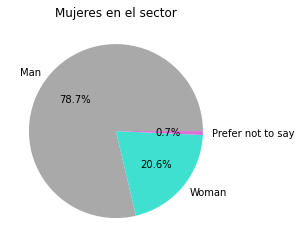

In [6]:
plt.figure()
plt.pie(df['gender'].value_counts()[:3],labels= df['gender'].value_counts().index[:3],autopct='%1.1f%%',  colors = ['darkgrey','turquoise','orchid']);
plt.title('Mujeres en el sector');

Como se puede observar, hay una gran mayoría de hombres en el sector de análisis de datos.

### Años programando por género

In [7]:
df.stb.freq(['years_programming','gender'])

,years_programming,gender,count,percent,cumulative_count,cumulative_percent
0,Junior,Man,234,42.010772,234,42.010772
1,Architect,Man,76,13.644524,310,55.655296
2,Mid-level,Man,68,12.208259,378,67.863555
3,Junior,Woman,65,11.669659,443,79.533214
4,Senior,Man,40,7.181329,483,86.714542
5,No code,Man,18,3.231598,501,89.946140
6,Mid-level,Woman,15,2.692998,516,92.639138
7,Architect,Woman,13,2.333932,529,94.973070
8,Senior,Woman,12,2.154399,541,97.127469
9,No code,Woman,9,1.615799,550,98.743268


In [8]:
lista_años_programando = ['No code','Junior','Mid-level','Senior','Architect']

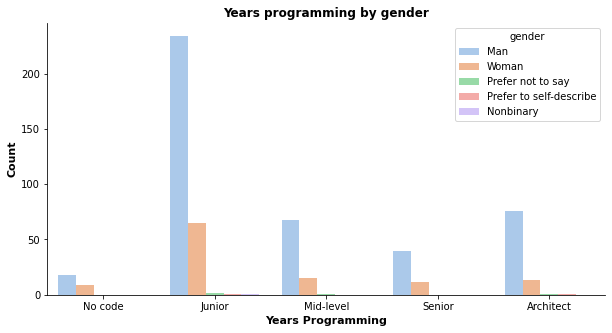

In [9]:
plt.figure(figsize= (10,5))
fig = sns.countplot(x='years_programming',hue='gender',data=df,order=lista_años_programando,palette='pastel')
fig.set_xlabel('Years Programming', fontweight = "bold", fontsize = 11)
fig.set_ylabel('Count', fontweight = "bold", fontsize = 11)

fig.set_title('Years programming by gender', fontweight = "bold", fontsize = 12)

fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False) ;

### Lenguajes de programación favoritos

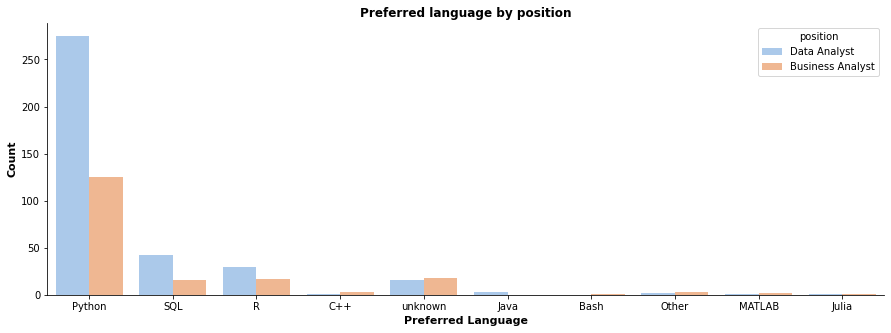

In [10]:
plt.figure(figsize= (15,5))
fig = sns.countplot(x='preferred_language',hue='position',data=df,palette='pastel')
fig.set_xlabel('Preferred Language', fontweight = "bold", fontsize = 11)
fig.set_ylabel('Count', fontweight = "bold", fontsize = 11)

fig.set_title('Preferred language by position', fontweight = "bold", fontsize = 12)

fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False);

### Salarios

In [11]:
salarios = ['unknown', '0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999',
    '5,000-7,499', '7,500-9,999', '10,000-14,999', '15,000-19,999',
    '20,000-24,999', '25,000-29,999', '30,000-39,999', '40,000-49,999',
    '50,000-59,999', '60,000-69,999', '70,000-79,999', '80,000-89,999',
    '90,000-99,999', '100,000-124,999', '125,000-149,999', '150,000-199,999',
    '200,000-249,999', '250,000-299,999', '>1,000,000']

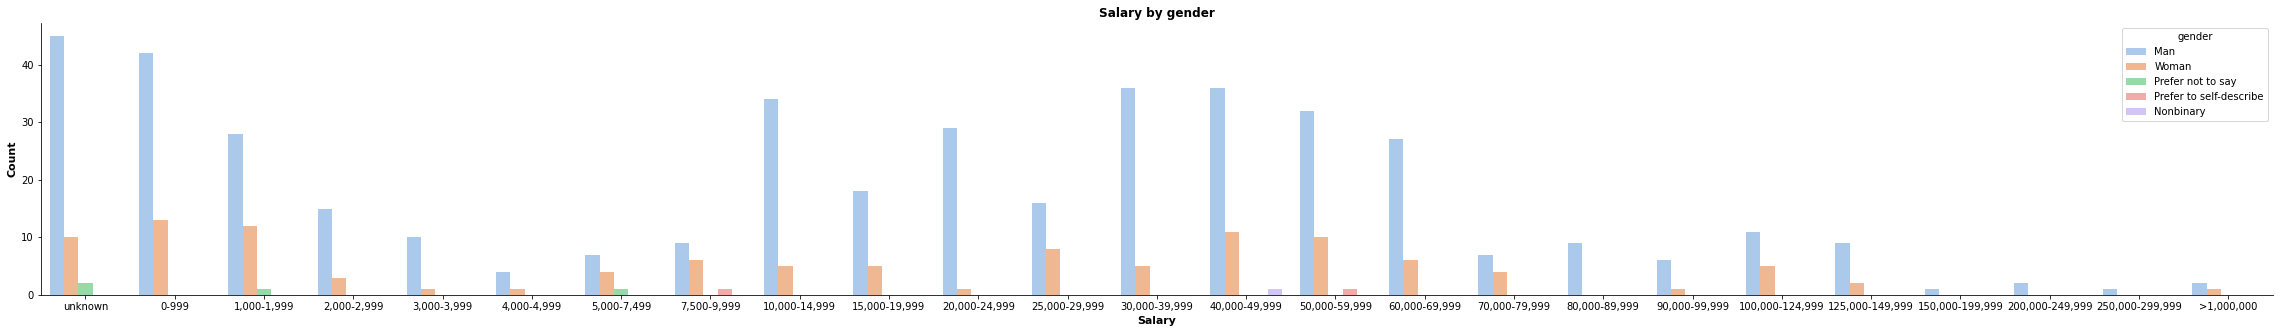

In [12]:
plt.figure(figsize= (40,5))
fig = sns.countplot(x='year_salary', hue='gender', data=df,order=salarios,palette = 'pastel')
fig.set_xlabel('Salary', fontweight = "bold", fontsize = 11)
fig.set_ylabel('Count', fontweight = "bold", fontsize = 11)

fig.set_title('Salary by gender', fontweight = "bold", fontsize = 12)

fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False);

### Años programando

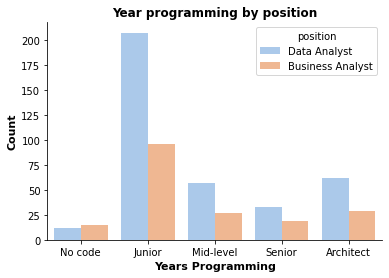

In [13]:
fig = sns.countplot(x='years_programming',hue='position',data=df,order=lista_años_programando,palette = 'pastel')
fig.set_xlabel('Years Programming', fontweight = "bold", fontsize = 11)
fig.set_ylabel('Count', fontweight = "bold", fontsize = 11)

fig.set_title('Year programming by position', fontweight = "bold", fontsize = 12)

fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False);

### Estudios

In [14]:
lista_estudios = ['Master’s degree','Bachelor’s degree','Doctoral degree','University study, no bachelor','High school','Not answer','Professional doctorate']

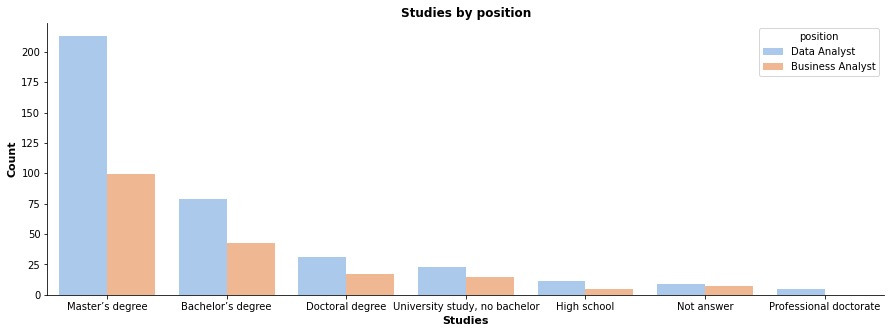

In [15]:
plt.figure(figsize= (15,5))
fig = sns.countplot(x='studies',hue='position',data=df,order=lista_estudios,palette = 'pastel')
fig.set_xlabel('Studies', fontweight = "bold", fontsize = 11)
fig.set_ylabel('Count', fontweight = "bold", fontsize = 11)

fig.set_title('Studies by position', fontweight = "bold", fontsize = 12)

fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False);

### Edad por género

In [16]:
lista_años = ['18-21','22-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-69']

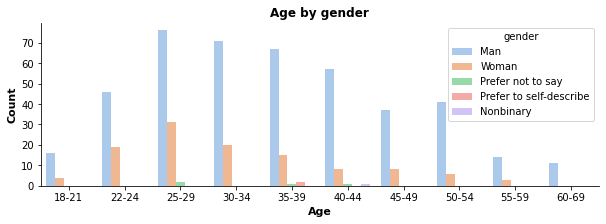

In [17]:
plt.figure(figsize= (10,3))
fig = sns.countplot(x='age',hue='gender',data=df,order=lista_años,palette = 'pastel')
fig.set_xlabel('Age', fontweight = "bold", fontsize = 11)
fig.set_ylabel('Count', fontweight = "bold", fontsize = 11)

fig.set_title('Age by gender', fontweight = "bold", fontsize = 12)

fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False);

In [18]:
df.stb.freq(['age','gender'])

,age,gender,count,percent,cumulative_count,cumulative_percent
0,25-29,Man,76,13.644524,76,13.644524
1,30-34,Man,71,12.746858,147,26.391382
2,35-39,Man,67,12.028725,214,38.420108
3,40-44,Man,57,10.233393,271,48.653501
4,22-24,Man,46,8.258528,317,56.912029
5,50-54,Man,41,7.360862,358,64.272890
6,45-49,Man,37,6.642729,395,70.915619
7,25-29,Woman,31,5.565530,426,76.481149
8,30-34,Woman,20,3.590664,446,80.071813
9,22-24,Woman,19,3.411131,465,83.482944


Investigar esto en otro sector.

### Herramientas

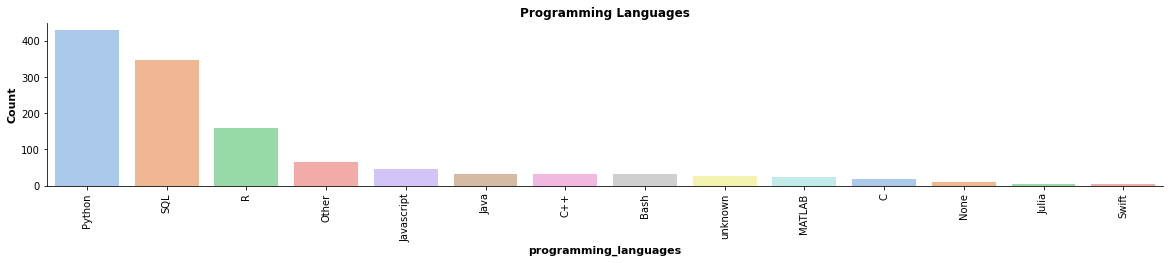

In [103]:
grafica(df_explode,'programming_languages','Programming Languages')

### ide

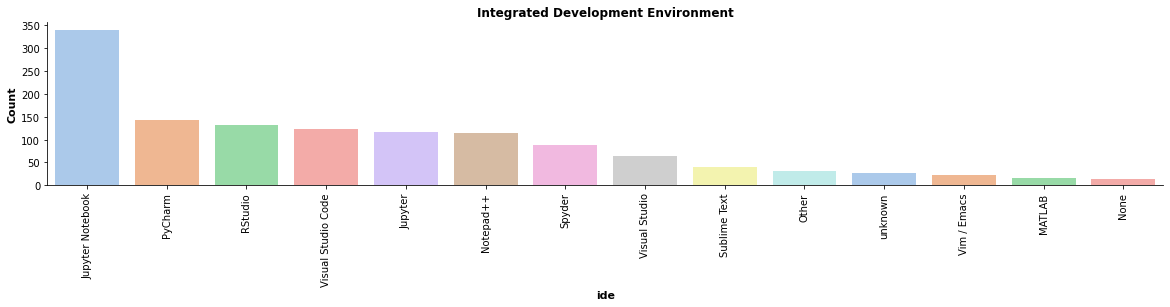

In [104]:
grafica(df_explode,'ide','Integrated Development Environment')

### Visualización

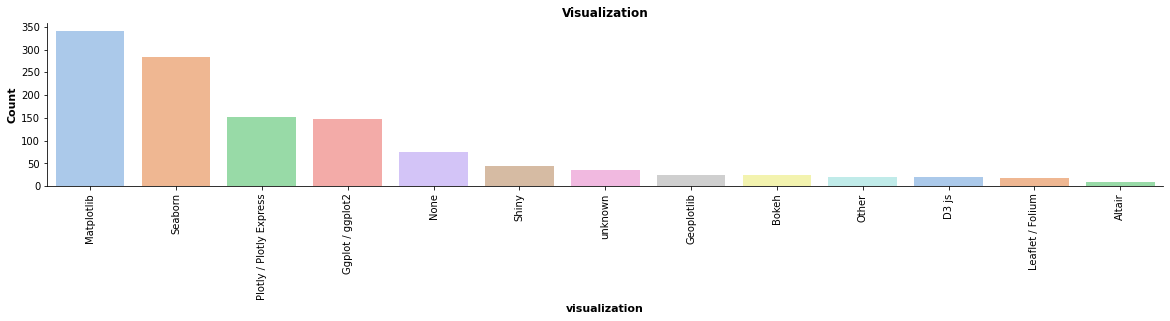

In [105]:
grafica(df_explode,'visualization','Visualization')

### Productos de machine learning

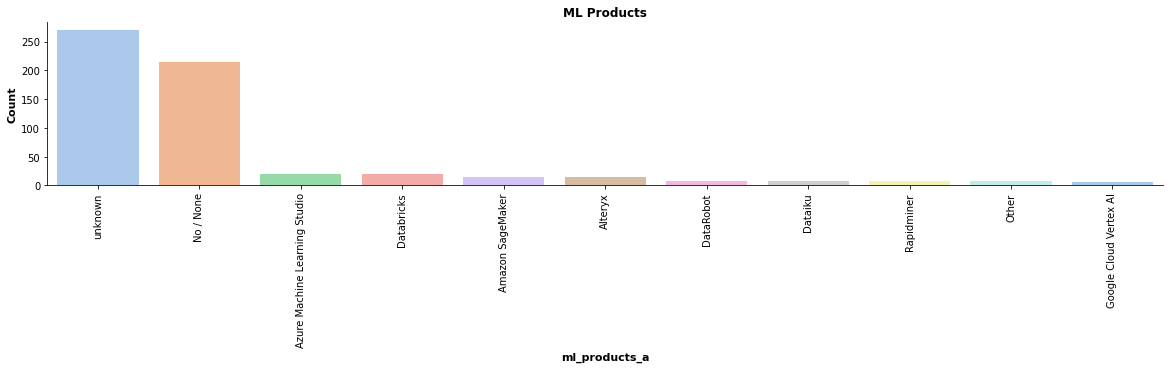

In [115]:
grafica(df_explode,'ml_products_a','ML Products')

### Herramientas de machine learning

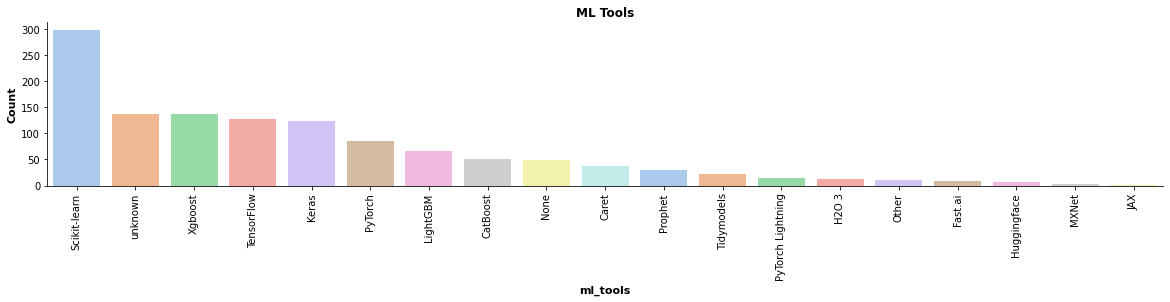

In [107]:
grafica(df_explode,'ml_tools','ML Tools')

### Notebooks

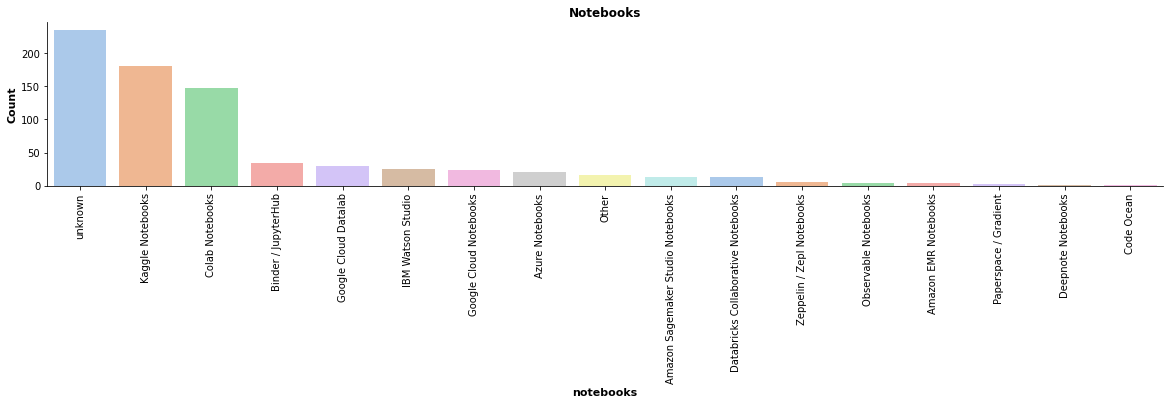

In [108]:
grafica(df_explode,'notebooks','Notebooks')

### Cursos

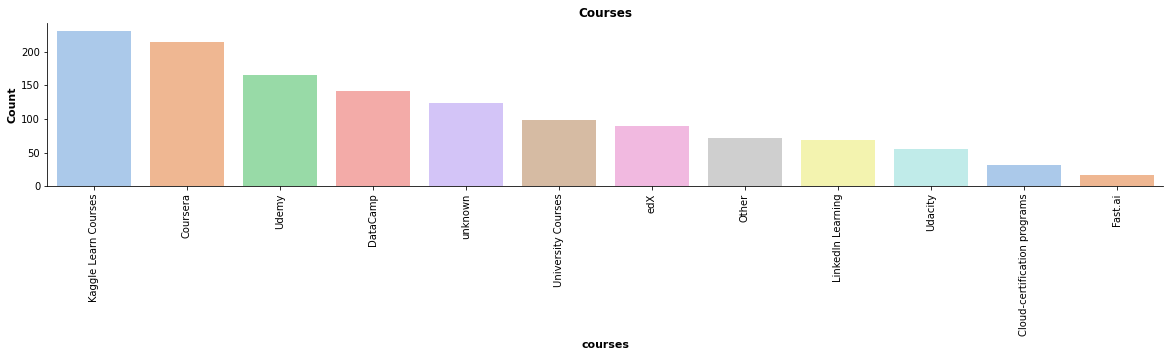

In [109]:
grafica(df_explode,'courses','Courses')

### Herramientas BI

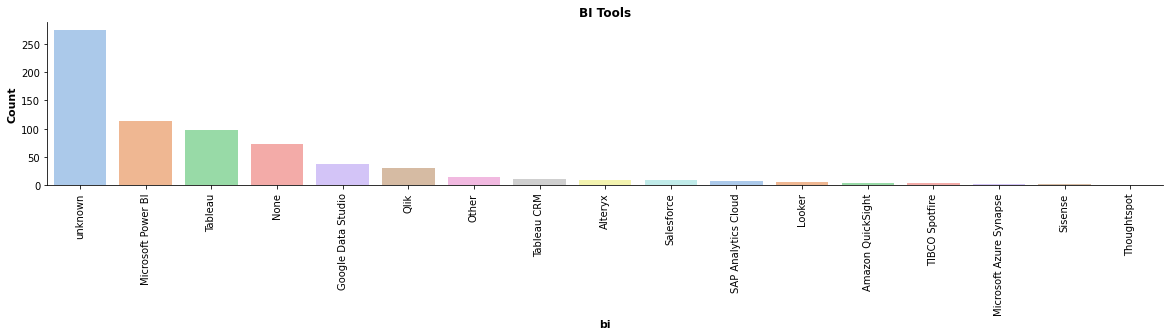

In [110]:
grafica(df_explode,'bi','BI Tools')

### Algoritmos de ML

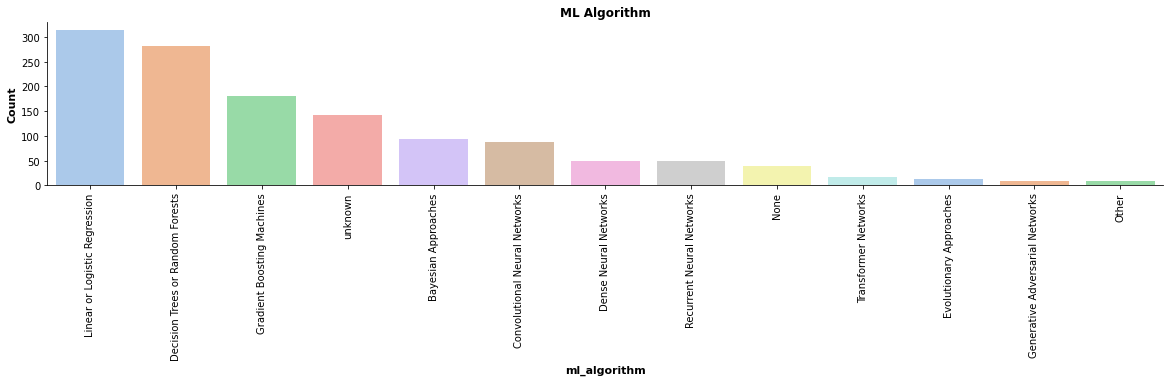

In [112]:
grafica(df_explode,'ml_algorithm','ML Algorithm')

### Social Media

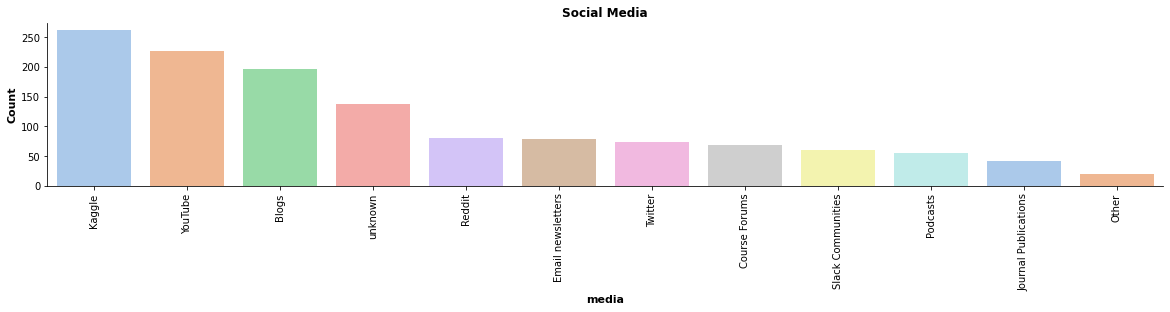

In [113]:
grafica(df_explode,'media','Social Media')

### Sharing Platforms

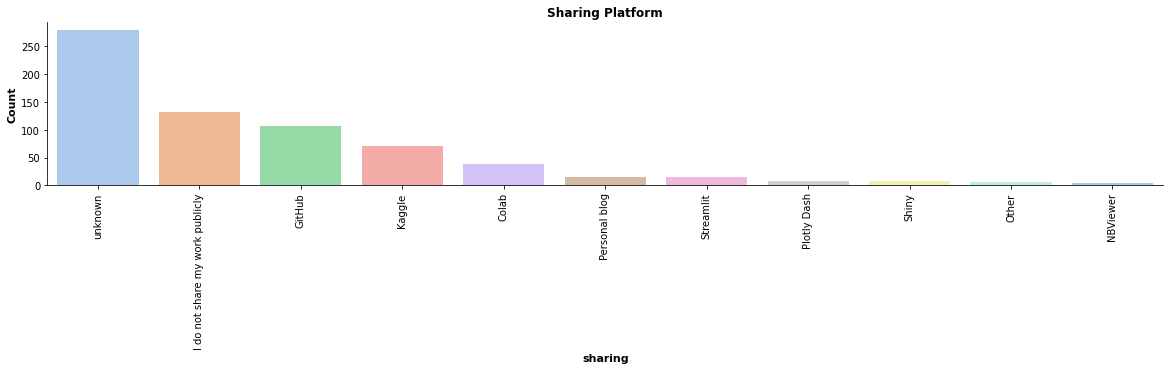

In [114]:
grafica(df_explode,'sharing','Sharing Platform')